<a href="https://colab.research.google.com/github/ymaydias/Tech_challenge/blob/main/2%C2%BA_Tech_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importação das bibliotecas básicas**

In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Captura da base de dados**

O arquivo utilizado foi baixado em csv a partir site da Investing
https://br.investing.com/indices/bovespa-historical-data

In [354]:
df = pd.read_csv("Dados Históricos - Ibovespa (4).csv", encoding = "utf-8", sep=",")

**Análise de base de dados**

In [355]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,10.07.2020,100.032,99.160,100.101,98.739,"9,15M","0,88%"
1,09.07.2020,99.160,99.770,100.191,98.861,"9,47M","-0,61%"
2,08.07.2020,99.770,97.765,99.973,97.765,"9,14M","2,06%"
3,07.07.2020,97.761,98.937,98.938,97.272,"8,95M","-1,19%"
4,06.07.2020,98.937,96.776,99.257,96.768,"9,49M","2,24%"


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      5000 non-null   object 
 1   Último    5000 non-null   float64
 2   Abertura  5000 non-null   float64
 3   Máxima    5000 non-null   float64
 4   Mínima    5000 non-null   float64
 5   Vol.      4999 non-null   object 
 6   Var%      5000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.6+ KB


In [357]:
df.shape

(5000, 7)

In [358]:
df.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [359]:
df.duplicated().sum()

0

In [360]:
df.describe()

,Último,Abertura,Máxima,Mínima
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49.317247,49.301664,49.824133,48.783624
std,24.845286,24.838491,25.045899,24.627038
min,8.371000,8.397000,8.513000,8.225000
25%,25.888750,25.878500,26.139000,25.646500
50%,52.561000,52.557500,53.193000,52.025500
75%,64.310500,64.310500,64.906000,63.691750
max,119.528000,119.528000,119.593000,118.108000


Com as informações acima, concluo que as tipagens estão incorretas e há nomes de colunas com caracteres especiais que podem gerar conflitos nos futuros códigos.

**Aqui, a adaptação é realizada, corrigindo formatações, tipagens e possíveis impedimentos no código.**

In [361]:
df["Data"] = pd.to_datetime(df["Data"], format="%d.%m.%Y", dayfirst=True)

In [362]:
df["Var%"] = df["Var%"].str.rstrip("%").str.replace(",", ".").astype("float")

In [363]:
df = df.rename(columns={"Vol.": "Volume"})

In [364]:
df["Volume"] = df["Volume"].str.replace(",", ".")

def converter_valores(valor):
    if isinstance(valor, str):
        if "M" in valor:
            return float(valor.replace("M", "")) * 1e6
        elif "K" in valor:
            return float(valor.replace("K", "")) * 1e3
        elif "B" in valor:
            return float(valor.replace("B", "")) * 1e9
    return float(valor)

df["Volume"] = df["Volume"].apply(converter_valores)

In [365]:
df = df.dropna()

### **Análise da série temporal - Fechamento da Ibovespa conforme o tempo**

<Axes: xlabel='Último', ylabel='Count'>

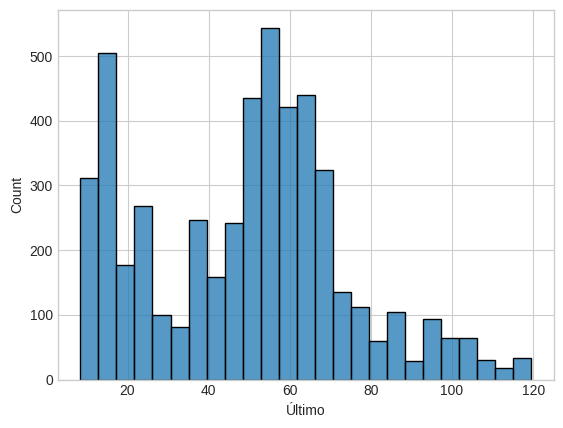

In [366]:
sns.histplot(data= df, x = "Último")

É possível analisar que, nestes 20 anos, o fechamento da bolsa que mais se repete é em 60.

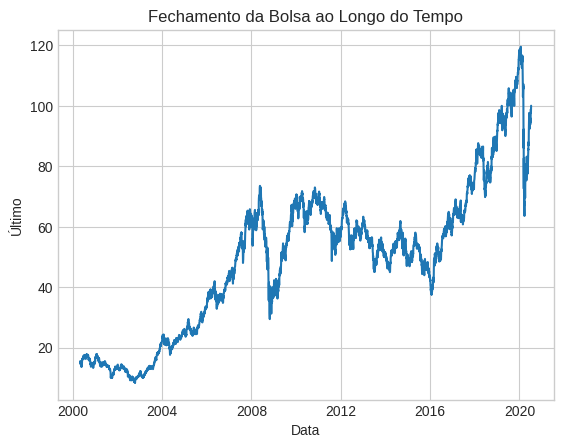

In [367]:
plt.plot(df['Data'], df['Último'])
plt.xlabel('Data')
plt.ylabel('Último')
plt.title('Fechamento da Bolsa ao Longo do Tempo')
plt.grid(True)
plt.show()

Apesar de inúmeras quedas ao longo destes 20 anos, observa-se que o fechamento da bolsa tem demonstrado uma tendência de alta em períodos mais longos, com aumentos significativos em grandes intervalos de tempo, conforme ilustrado pelo gráfico.

# **Conceitos em séries temporais**

Para decompormos séries temporáis em padrões para melhor entendimento, é importante saber os conceitos de Observado, Tendência, Sazonalidade e Resíduo.

*   Observado: É o ponto de partida da análise. Os dados observados são os valores reais coletados ao longo do tempo. Analisar esses dados ajuda a identificar padrões e tendências que podem estar presentes.
*   Tendência: A tendência é a direção geral e o padrão de longo prazo dos dados. Identificar a tendência ajuda a entender se os dados estão crescendo, decrescendo ou se mantendo constantes ao longo do tempo. Isso é essencial para prever futuros valores.
*   Sazonalidade: A sazonalidade é o padrão que se repete em intervalos regulares, como ciclos diários, semanais, mensais ou anuais. Reconhecer a sazonalidade permite ajustar previsões e entender variações previsíveis nos dados.
*  Resíduo: Após remover a tendência e a sazonalidade, o resíduo é o que resta. Analisar os resíduos ajuda a identificar variações aleatórias ou anomalias que não são explicadas pelos componentes estruturais da série temporal.

Para nossa análise usaremos a biblioteca statsmodels.tsa.seasonal - seasonal_decompose

In [368]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [369]:
analises = seasonal_decompose(df["Último"], model="aditivo", period=12)

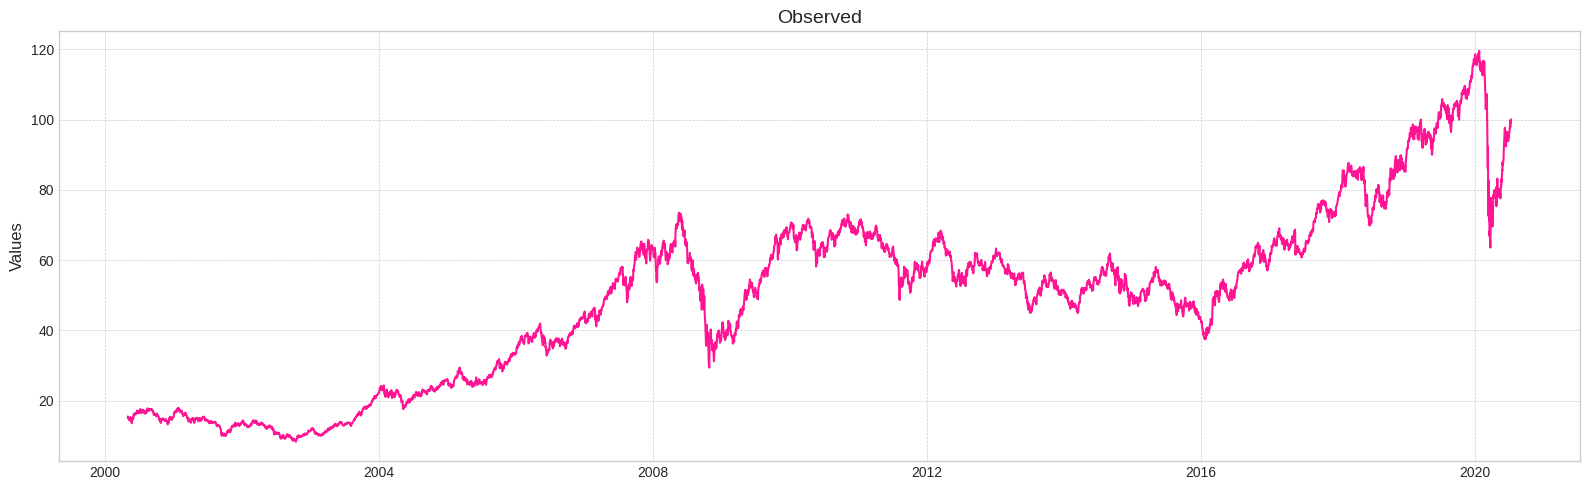

In [370]:
fig, ax1 = plt.subplots(figsize=(16, 5))
ax1.plot(df['Data'], analises.observed, linestyle='-', color='deeppink')
ax1.set_title('Observed', fontsize=14)
ax1.set_ylabel('Values', fontsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

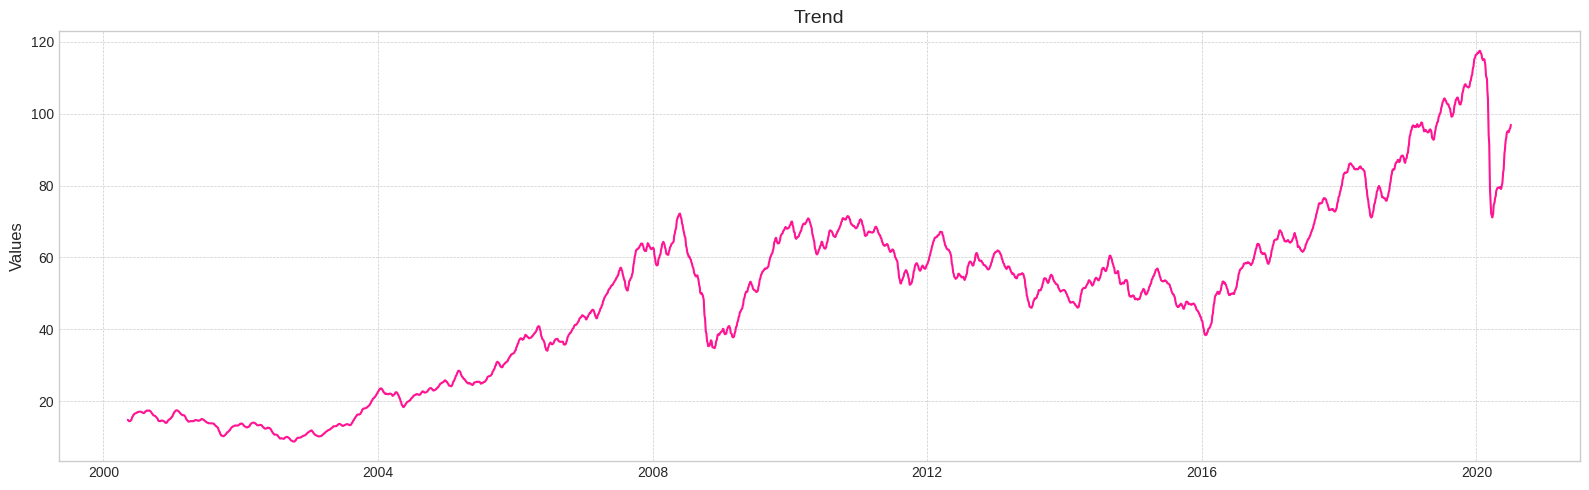

In [371]:
fig, ax2 = plt.subplots(figsize=(16, 5))
ax2.plot(df['Data'], analises.trend, linestyle='-', color='deeppink')
ax2.set_title('Trend', fontsize=14)
ax2.set_ylabel('Values', fontsize=12)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

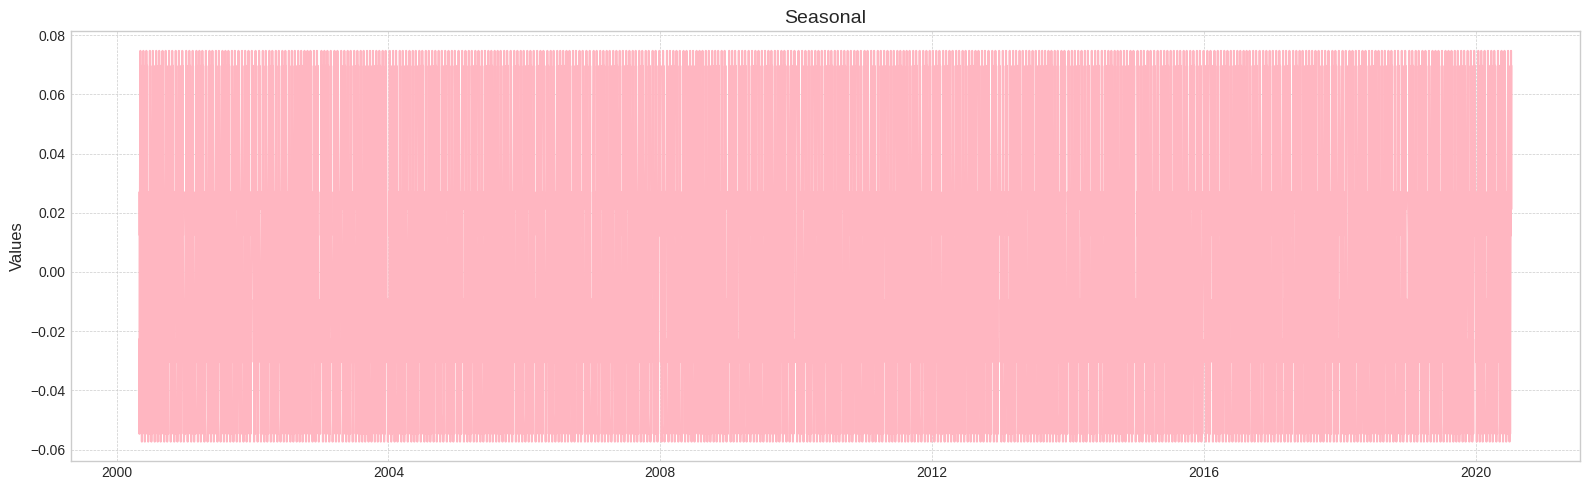

In [372]:
fig, ax3 = plt.subplots(figsize=(16, 5))
ax3.plot(df['Data'], analises.seasonal, linestyle='-', color='lightpink')
ax3.set_title('Seasonal', fontsize=14)
ax3.set_ylabel('Values', fontsize=12)
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

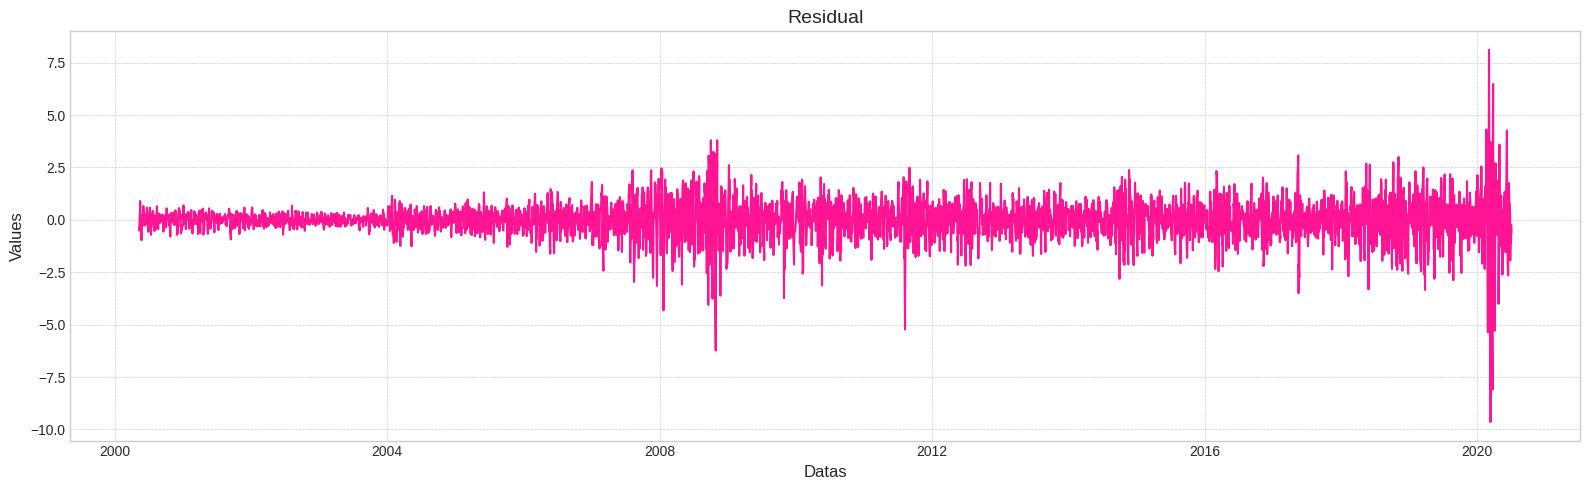

In [373]:
fig, ax4 = plt.subplots(figsize=(16, 5))
ax4.plot(df['Data'], analises.resid, linestyle='-', color='deeppink')
ax4.set_title('Residual', fontsize=14)
ax4.set_ylabel('Values', fontsize=12)
ax4.set_xlabel('Datas', fontsize=12)
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### **Augmented Dickey-Fuller - Análise de Estacionaridade da série temporal**






A seguir, vamos analisar a estacionaridade dos nossos dados ao longo do tempo, utilizando a técnica de Augmented Dickey-Fuller.

A técnica de Augmented Dickey-Fuller (ADF) é um teste estatístico usado para verificar a estacionaridade de uma série temporal. Estacionaridade significa que as propriedades estatísticas da série, como a média e a variância, são constantes ao longo do tempo. O teste ADF ajuda a determinar se uma série temporal possui uma raiz unitária, indicando a presença de uma tendência não estacionária. Se a hipótese nula de que a série tem uma raiz unitária é rejeitada, isso sugere que a série é estacionária.

Para isso importaremos a biblioteca statsmodels.tsa.stattools adfuller


In [374]:
from statsmodels.tsa.stattools import adfuller

In [375]:
print(f"Estatística do teste: {teste_adfuller[0]}")
print(f"Valor-p: {teste_adfuller[1]}")

Estatística do teste: -1.6389105310008945
Valor-p: 0.46283012866349665


In [376]:
valores_ultimos = df.Último.values

In [377]:
teste_adfuller = adfuller(valores_ultimos)

Neste caso, o valor-p de 0.4628 é significativamente maior que o nível de significância comum de 0.05. Portanto, não podemos rejeitar a hipótese nula de que a série temporal possui uma raiz unitária. Isso implica que não há evidências suficientes para concluir que a série temporal é estacionária.

Nesta análise, optamos por não utilizar transformações adicionais, como a aplicação de logaritmos, para tentar alcançar a estacionariedade da série temporal.

### **Modelo preditivo - Forecast do fechamento diário da Ibovespa**

In [378]:
from prophet import Prophet

In [379]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [380]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [381]:
df_dropado = df.drop(columns=['Abertura', 'Máxima', 'Mínima', 'Volume', 'Var%'])

In [382]:
 df_renomeado = df_dropado.rename(columns={'Data': 'ds', 'Último': 'y'})

In [383]:
 df_renomeado =  df_renomeado.set_index('ds')

In [384]:
df_renomeado.head()

,y
ds,
2020-07-10,100.032
2020-07-09,99.160
2020-07-08,99.770
2020-07-07,97.761
2020-07-06,98.937


In [385]:
split_date = '2014-01-01'
df_renomeado_train = df_renomeado.loc[df_renomeado.index <= split_date].copy()
df_renomeado_test = df_renomeado.loc[df_renomeado.index > split_date].copy()

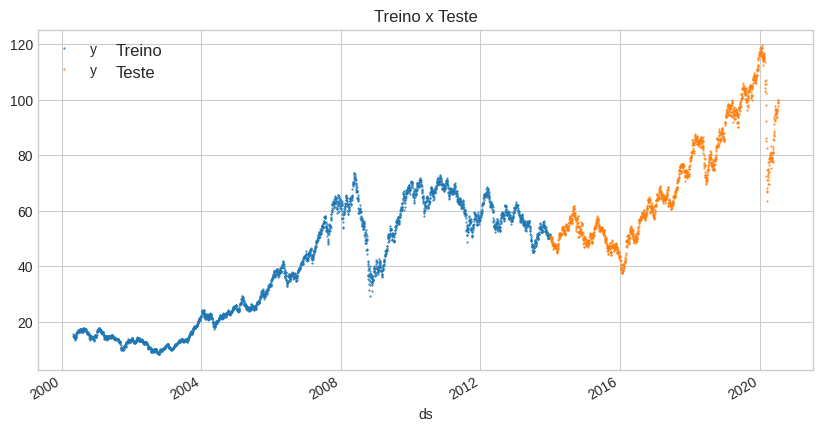

In [408]:
fig, ax = plt.subplots(figsize=(10, 5))
df_renomeado_train.plot(ax=ax, style='.', markersize=1, label='Treino')
df_renomeado_test.plot(ax=ax, style='.', markersize=1, label='Teste')
plt.title('Treino x Teste')
plt.legend()
ax.annotate('Treino', xy=(0.1, 0.925), xycoords='axes fraction', fontsize=12)
ax.annotate('Teste', xy=(0.1, 0.86), xycoords='axes fraction', fontsize=12)
plt.show()